# Results of the pipeline

927


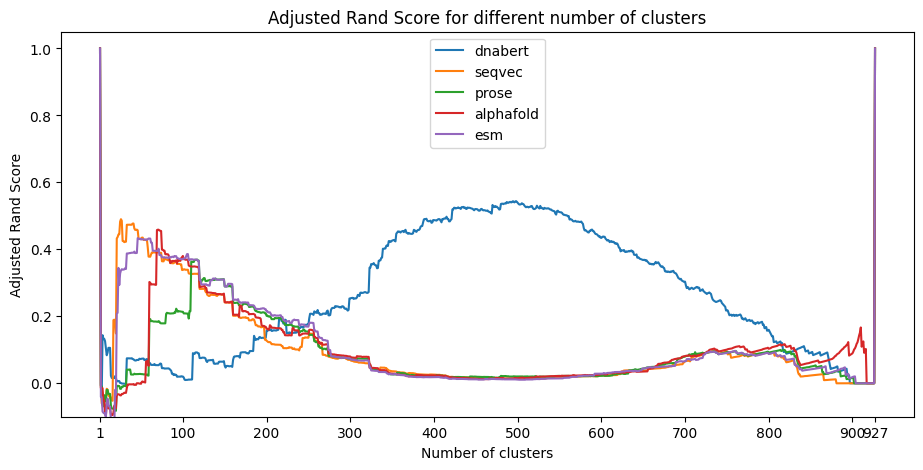

dnabert    seqvec     prose  alphafold       esm
combiner dimensional PCA                                                   
pca      10               0.381832  0.319901  0.154855   0.275383  0.278563
         50               0.421300  0.265386  0.145781   0.204797  0.226103
         all              0.424825  0.216144  0.145781   0.201271  0.214838
average  10               0.342568  0.297053  0.154256   0.270510  0.261098
         50               0.368445  0.242880  0.155808   0.205786  0.216630
         all              0.367767  0.200441  0.155808   0.209143  0.202323
sum      10               0.329985  0.352687  0.228788   0.360978  0.323146
         50               0.337563  0.288122  0.218890   0.348063  0.288632
         all              0.337366  0.252648  0.218890   0.345714  0.270499
max      10               0.371001  0.327072  0.246538   0.397666  0.340298
         50               0.485118  0.300900  0.219514   0.340019  0.303142
         all              0.520237  0.233254  0.213236   0.243817  0.233942

In [1]:
import sys
sys.path.append('..')
import pickle
from autoembedding.results_manager import results2table
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

PATH = '/storagenfs/m.tolloso/BioEmbedding/results/phylogenetic_results_satb2.pkl'

results = pickle.load(open(PATH, "rb"))
r, best_lst, results_dict_ars = results2table(
    results, 
    embedders= [
        "dnabert", 
        "seqvec", 
        "prose", 
        "alphafold", 
        "esm"
        ],
    combiners = ["pca", "average", "sum", "max"],
    pcas = [ '10', '50', 'all'],
    metric="mean_adjusted_rand_score", 
    
    preferred_metric_embedding="euclidean", 
    preferred_method_embedding="average", 
    
    preferred_metric_gt="euclidean", # euclidean, average: equivalent to UPGMA when the gt is the distance matrix
    preferred_method_gt="average",
    
    preferred_edge_weight="jaccard",
    preferred_annotation="keywords"
)
# r.to_latex("./latex_output.tex")

fig, _ = plt.subplots(figsize=(11, 5))

plt.xlabel("Number of clusters")
plt.ylabel("Adjusted Rand Score")
plt.title("Adjusted Rand Score for different number of clusters")

plt.ylim(-0.1, 1.05)

X = [i for i in range(len(best_lst), 0, -1)]
print(len(best_lst))

plt.xticks([i for i in range(0, len(best_lst)+1, 100)][1:] + [1] + [len(best_lst)])

plt.plot(X, results_dict_ars['max']['all']['dnabert'], label='dnabert')
plt.plot(X, results_dict_ars['max']['10']['seqvec'], label='seqvec')
plt.plot(X, results_dict_ars['max']['all']['prose'], label='prose')
plt.plot(X, results_dict_ars['max']['all']['alphafold'], label='alphafold')
plt.plot(X, results_dict_ars['max']['10']['esm'], label='esm')
plt.legend()
plt.show()
# fig.savefig(Path(PATH).stem + '.eps')
r
